In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

**Separate out experiments from one file that contains multiple experiments**


In [29]:
# read data

exp_no = 104
last_file_no = 152
file_name = str(exp_no)+"_SHT_SMD.txt"

file_path = "../data/raw/" + file_name
# print(file_path)
df = pd.read_csv(file_path, sep=',' , usecols=['timestamp','SHT40_temp','SHT40_Humidity','A1_Sensor', 'A1_Resistance'])
timestamp_data = df['timestamp'].values #[7875:]
a1_sensor_data = df['A1_Sensor'].values #[7875:]
a1_r_data = df['A1_Resistance'].values

In [ ]:
df.head()

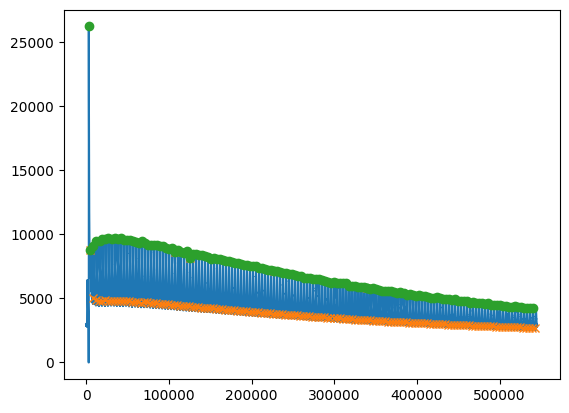

In [30]:
# Find peaks and their properties
peaks, properties = find_peaks(a1_sensor_data, width=50, height=1)

# Get the peak heights
peak_heights = properties['peak_heights']

# Initialize lists to hold the smaller and larger peaks
smaller_peaks = []
larger_peaks = []

# Iterate over the peaks
for i in range(len(peaks) - 1):
    # If the next peak is smaller, label the current peak as a larger peak
    if peak_heights[i] > peak_heights[i + 1]:
        larger_peaks.append(peaks[i])
        smaller_peaks.append(peaks[i + 1])

# Convert lists to numpy arrays for indexing
smaller_peaks = np.array(smaller_peaks)
larger_peaks = np.array(larger_peaks)

# Plot data
plt.plot(a1_sensor_data)

# Overlay smaller peaks with 'x'
plt.plot(smaller_peaks, a1_sensor_data[smaller_peaks], "x")

# Overlay larger peaks with 'o'
plt.plot(larger_peaks, a1_sensor_data[larger_peaks], "o")

plt.show()

*Save Partially Processed Data into Individual Files at Interim Folder*

In [31]:
# Create data file name in sequence

exp_folder = str(exp_no) + '/'
folder_path = f'../data/interim/' + exp_folder 
# Check if the directory exists and create it if it doesn't
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Iterate over the smaller_peaks array
for i in range(len(smaller_peaks) - 1):
    # Get the data between the current and next smaller peak
    data = a1_r_data[smaller_peaks[i]:smaller_peaks[i + 1]]
    timestamps = timestamp_data[smaller_peaks[i]:smaller_peaks[i + 1]]
    relative_time = timestamps - timestamps[0]

    # Write the data to a file
    with open(f'{folder_path}{i + last_file_no}.txt', 'w') as f:
        # Write the header
        f.write('timestamp,relative_time,resistance_ohm\n')    
        # Write the data
        for t, rt, value in zip(timestamps, relative_time, data):
            f.write(f'{t},{rt},{value}\n')